## 市场模型

* 线性需求曲线 $Q = a_d - b_d p$

* 线性供给曲线 $Q = a_z + b_z(p-t)$

* p: 市场的价格
* t: 每单位商品的税收

从经济学的理论考虑，这个类应含有
1. （计算各种量的）方法
    * 均衡价格
    * 均衡时的供给/需求量
    * （税收上涨的）update
    * 生产者剩余
    * 消费者剩余

In [1]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
## 数值积分函数quad from scipy

from scipy.integrate import quad
class Market:
    
    def __init__(self, ad, bd, az, bz, tax):
        self.ad = ad;
        self.bd = bd;
        self.az = az;
        self.bz = bz;
        self.tax = tax;
        if (az>ad):
            raise ValueError('Insufficient Demand!');
            
            
    def price(self):
            ad = self.ad;
            bd = self.bd;
            az = self.az;
            bz = self.bz;
            tax = self.tax;
            price = (ad - az + bz*tax)/(bd+bz)
            return price
        
        
    def quantity(self):
            quantity = self.ad - self.bd  * self.price();
            return quantity;
        
    def consumer_surplus(self):
            
            integrand = lambda x: (self.ad/self.bd) - (1/self.bd) * x;
            area, error = quad(integrand, 0, self.quantity());
            return area - self.price()*self.quantity();
        
    def producer_surplus(self):
            
            integrand = lambda x: -(self.az.self.bz) + (1/self.bz) * x;
            area, error = quad(integrand, 0, self.quantity());
            return (self.price()- self.tax) * self.quantity() - area;
        
    def tax_revenue(self):
            
            tax_revenue = self.tax * self.quantity();
            return tax_revenue;
        
    def inverse_demand(self,x):
            return self.ad/self.bd - (1/self.bd)*x;
        
    def inverse_supply(self,x):
            return -(self.az/self.bz) + (1/self.bz) * x + self.tax;
        
    def inverse_supply_without_tax(self,x):
            
            return -(self.az/self.bz) + (1/self.bz) * x;
         
        

In [3]:
baseline_paras = 15, 0.5, -2, 0.5, 3;
market1 = Market(*baseline_paras);
print('eq price = ', market1.price());

eq price =  18.5


In [4]:
market1.price()


18.5

In [8]:
quantity_max = market1.quantity() * 2;

quantity_grid = np.linspace(0.0, quantity_max, 100);

price_for_demand = market1.inverse_demand(quantity_grid);
price_for_supply = market1.inverse_supply(quantity_grid);
price_for_supply_without_tax = market1.inverse_supply_without_tax(quantity_grid);


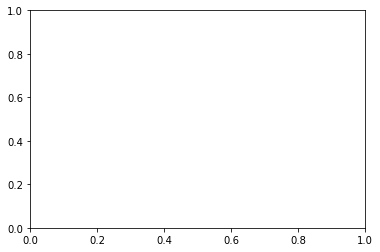

In [10]:
fig, ax = plt.subplots();


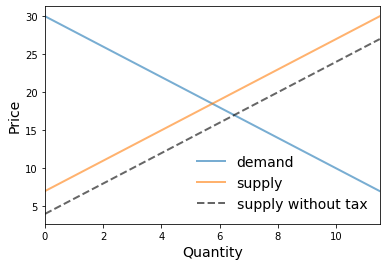

In [18]:
fig, ax = plt.subplots();
ax.plot(quantity_grid, price_for_demand, lw=2, alpha = 0.6, label = 'demand');
ax.plot(quantity_grid, price_for_supply, lw = 2, alpha = 0.6, label = 'supply');
ax.plot(quantity_grid, price_for_supply_without_tax, '--k', lw = 2, alpha = 0.6, label = 'supply without tax');

ax.set_xlim(0, quantity_max);
ax.set_xlabel('Quantity', fontsize = 14);
ax.set_ylabel('Price', fontsize = 14);

ax.legend(loc = 'lower right', frameon = False, fontsize = 14);
plt.show()
